In [211]:
import numpy as np
import matplotlib.pyplot as plt

In [212]:
N = 2**12 # 4096 pt FFT 
fs = 2**15 # 32768Hz sampling

# Create 1s worth of x samples
x = np.linspace(0.0, 1.0, fs)
x.shape

(32768,)

In [237]:
yt = np.sin(2 * np.pi * 180 * x) + np.sin(2 * np.pi * 110 * x)
yt.shape

(32768,)

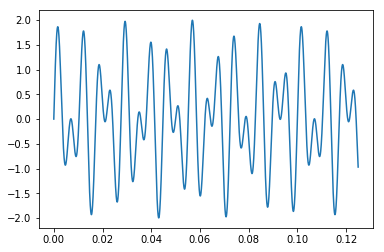

In [238]:
plt.plot(x[:N], yt[:N])

In [239]:
sp = np.fft.fft(yt[:N])
sp

array([105.72352199 +0.j        , 106.08961336 +3.47186361j,
       107.20692863 +7.05616503j, ..., 109.13547231-10.8778253j ,
       107.20692863 -7.05616503j, 106.08961336 -3.47186361j])

In [240]:
bins_to_shift = 4

In [241]:
mag = np.absolute(sp)
phase = np.angle(sp)
mag_new = np.zeros(N)
mag_new[0] = mag[0]
mag_new[1:(N//2) + 1] = np.roll(mag[1:(N//2) + 1], bins_to_shift)
mag_new[(N//2)+1:] = np.roll(mag[(N//2)-1:0:-1], -bins_to_shift)

phase_new = np.zeros(N)
phase_new[0] = phase[0]
phase_new[1:N//2 + 1] = np.roll(phase[1:(N//2) + 1], bins_to_shift)
phase_new[(N//2) + 1:] = np.roll(-phase[(N//2)-1:0:-1], -bins_to_shift)

sp_new = mag_new * np.exp(1j*phase_new)
sp_new

array([105.72352199+0.j        ,   0.47963641-0.00115558j,
         0.47963647-0.00077038j, ...,   0.47963647+0.00077038j,
         0.47963641+0.00115558j,   0.47963631+0.00154077j])

In [242]:
phase

array([ 0.        ,  0.03271409,  0.06572339, ..., -0.09934457,
       -0.06572339, -0.03271409])

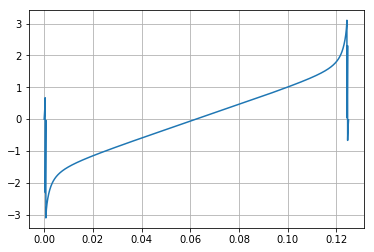

In [243]:
plt.plot(x[:N], phase)
plt.grid()

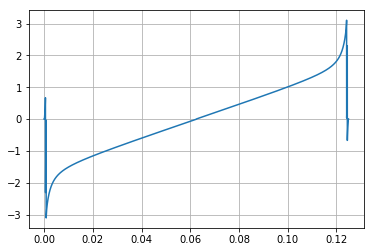

In [244]:
plt.plot(x[:N], phase_new)
plt.grid()

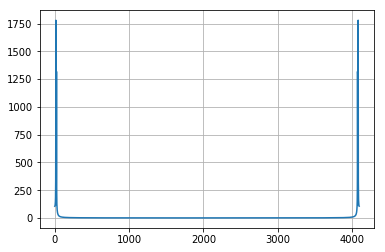

In [245]:
plt.plot(range(0, 4096), mag)
plt.grid()

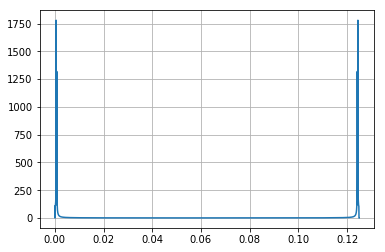

In [246]:
plt.plot(x[:N], mag_new)
plt.grid()

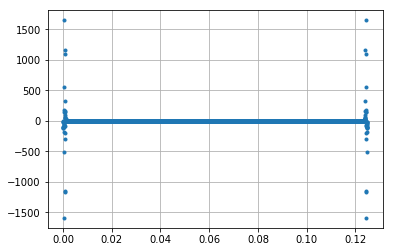

In [247]:
plt.plot(x[:N], mag_new - mag, '.')
plt.grid()

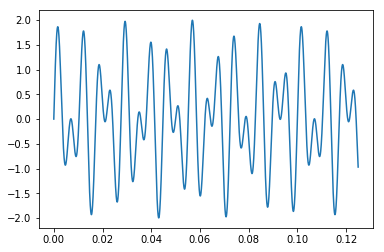

In [248]:
plt.plot(x[:N], np.fft.ifft(sp))

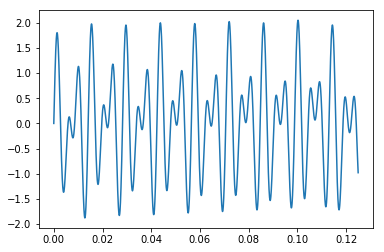

In [249]:
plt.plot(x[:N], np.fft.ifft(sp_new))

In [250]:
import struct

In [190]:
with open("bram_sine_init.coe", "w") as f:
    f.write(f"memory_initialization_radix=16;\n")
    f.write(f"memory_initialization_vector=\n")
    for val in yt[:N]:
        val = int(val * (10**4))
        res = struct.pack("<h", val)
        print(val)
        print(f"{hex(res[1])[2:].zfill(2)}{hex(res[0])[2:].zfill(2)}")
        f.write(f"{hex(res[1])[2:].zfill(2)}{hex(res[0])[2:].zfill(2)}\n")

0
0000
1982
07be
3895
0f37
5670
1626
7246
1c4e
8568
2178
9589
2575
10276
2824
10606
296e
10569
2949
10171
27bb
9427
24d3
8369
20b1
7037
1b7d
5484
156c
3769
0eb9
1958
07a6
120
0078
-1674
f976
-3357
f2e3
-4864
ed00
-6136
e808
-7125
e42b
-7792
e190
-8108
e054
-8061
e083
-7648
e220
-6882
e51e
-5788
e964
-4405
eecb
-2779
f525
-968
fc38
964
03c4
2950
0b86
4920
1338
6804
1a94
8536
2158
10054
2746
11306
2c2a
12249
2fd9
12851
3233
13092
3324
12967
32a7
12482
30c2
11658
2d8a
10528
2920
9135
23af
7535
1d6f
5787
169b
3959
0f77
2119
0847
340
0154
-1312
fae0
-2775
f529
-3991
f069
-4913
eccf
-5506
ea7e
-5744
e990
-5617
ea0f
-5126
ebfa
-4287
ef41
-3129
f3c7
-1691
f965
-23
ffe9
1814
0716
3759
0eaf
5741
166d
7689
1e09
9536
2540
11216
2bd0
12669
317d
13845
3615
14703
396f
15214
3b6e
15362
3c02
15143
3b27
14568
38e8
13661
355d
12457
30a9
11002
2afa
9352
2488
7571
1d93
5724
165c
3883
0f2b
2118
0846
494
01ee
-924
fc64
-2086
f7da
-2944
f480
-3466
f276
-3630
f1d2
-3427
f29d
-2864
f4d0
-1959
f859
-742
fd1a
743

-2674
f58e
-1494
fa2a
-622
fd92
-91
ffa5
78
004e
-116
ff8c
-670
fd62
-1561
f9e7
-2758
f53a
-4214
ef8a
-5877
e90b
-7686
e1fa
-9572
da9c
-11467
d335
-13301
cc0b
-15006
c562
-16519
bf79
-17783
ba89
-18752
b6c0
-19390
b442
-19672
b328
-19588
b37c
-19140
b53c
-18344
b858
-17227
bcb5
-15831
c229
-14206
c882
-12410
cf86
-10508
d6f4
-8570
de86
-6665
e5f7
-4863
ed01
-3228
f364
-1820
f8e4
-689
fd4f
124
007c
590
024e
694
02b6
433
01b1
-182
ff4a
-1130
fb96
-2373
f6bb
-3864
f0e8
-5548
ea54
-7363
e33d
-9239
dbe9
-11108
d49c
-12899
cd9d
-14547
c72d
-15988
c18c
-17169
bcef
-18046
b982
-18585
b767
-18764
b6b4
-18577
b76f
-18028
b994
-17136
bd10
-15933
c1c3
-14461
c783
-12773
ce1b
-10929
d54f
-8995
dcdd
-7041
e47f
-5136
ebf0
-3350
f2ea
-1746
f92e
-381
fe83
695
02b7
1447
05a7
1847
0737
1882
075a
1553
0611
874
036a
-128
ff80
-1417
fa77
-2942
f482
-4646
edda
-6464
e6c0
-8329
df77
-10170
d846
-11918
d172
-13506
cb3e
-14876
c5e4
-15974
c19a
-16758
be8a
-17199
bcd1
-17278
bc82
-16990
bda2
-16343
c029
-15361
c

1772
7830
1e96
9736
2608
11650
2d82
13503
34bf
15226
3b7a
16757
4175
18039
4677
19026
4a52
19681
4ce1
19981
4e0d
19914
4dca
19483
4c1b
18705
4911
17606
44c6
16228
3f64
14620
391c
12842
322a
10959
2acf
9040
2350
7154
1bf2
5372
14fc
3756
0eac
2368
0940
1257
04e9
464
01d0
18
0012
-65
ffbf
216
00d8
852
0354
1819
071b
3082
0c0a
4593
11f1
6296
1898
8129
1fc1
10024
2728
11911
2e87
13720
3598
15385
3c19
16843
41cb
18041
4679
18935
49f7
19490
4c22
19686
4ce6
19514
4c3a
18982
4a26
18106
46ba
16919
4217
15464
3c68
13792
35e0
11965
2ebd
10048
2740
8112
1fb0
6225
1851
4457
1169
2871
0b37
1524
05f4
465
01d1
-267
fef5
-648
fd78
-665
fd67
-318
fec2
379
017b
1400
0578
2706
0a92
4249
1099
5970
1752
7805
1e7d
9686
25d6
11543
2d17
13306
33fa
14910
3a3e
16294
3fa6
17407
43ff
18206
471e
18660
48e4
18753
4941
18479
482f
17846
45b6
16877
41ed
15606
3cf6
14078
36fe
12347
303b
10475
28eb
8530
2152
6581
19b5
4699
125b
2950
0b86
1398
0576
98
0062
-904
fc78
-1574
f9da
-1888
f8a0
-1837
f8d3
-1423
fa71
-664
fd68
410

-1686
f96a
-3053
f413
-4644
eddc
-6398
e702
-8250
dfc6
-10132
d86c
-11973
d13b
-13704
ca78
-15261
c463
-16585
bf37
-17626
bb26
-18346
b856
-18716
b6e4
-18721
b6df
-18360
b848
-17646
bb12
-16601
bf27
-15264
c460
-13683
ca8d
-11912
d178
-10017
d8df
-8065
e07f
-6126
e812
-4269
ef53
-2562
f5fe
-1065
fbd7
168
00a8
1095
0447
1682
0692
1909
0775
1771
06eb
1273
04f9
436
01b4
-707
fd3d
-2115
f7bd
-3733
f16b
-5499
ea85
-7349
e34b
-9211
dc05
-11016
d4f8
-12696
ce68
-14187
c895
-15434
c3b6
-16388
bffc
-17012
bd8c
-17282
bc7e
-17187
bcdd
-16726
beaa
-15917
c1d3
-14785
c63f
-13371
cbc5
-11725
d233
-9905
d94f
-7975
e0d9
-6005
e88b
-4064
f020
-2222
f752
-544
fde0
910
038e
2090
082a
2954
0b8a
3473
0d91
3629
0e2d
3420
0d5c
2854
0b26
1956
07a4
760
02f8
-687
fd51
-2332
f6e4
-4111
eff1
-5956
e8bc
-7798
e18a
-9567
daa1
-11196
d444
-12622
ceb2
-13792
ca20
-14659
c6bd
-15190
c4aa
-15363
c3fd
-15170
c4be
-14614
c6ea
-13715
ca6d
-12502
cf2a
-11017
d4f7
-9313
db9f
-7450
e2e6
-5493
ea8b
-3512
f248
-1577
f9d7
242


In [191]:
N = 20

In [56]:
zerostest = np.zeros(N)
source = np.linspace(1, N, N)
zerostest[0] = source[0]
zerostest[1:(N//2) + 1] = source[1:(N//2) + 1]
zerostest[(N//2) + 1:] = source[(N//2)-1:0:-1]
zerostest

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 10.,  9.,
        8.,  7.,  6.,  5.,  4.,  3.,  2.])

In [57]:
source

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])